In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter

colors = sns.color_palette("tab10").as_hex()
colors = ["#402040"] + colors
palette = {
    "noir": colors[0],
    "noir-shared": colors[0],
    "noir-opt": colors[0],
    "omp": colors[4],
    "mpi": colors[4],
    "mpi-mmap": colors[4],
    "mpi-opemp": colors[4],
    "rayon": colors[3],
    "flink": colors[2],
    "timely": colors[5],
    "ideal": colors[8],
    "linear": colors[8],
}
linestyles = ["-", "--", ":", "-."]
sns.set_theme(context='paper', style='whitegrid', palette="tab10",
              font='Times New Roman', font_scale=2.5,)


In [2]:
df = pd.read_csv("../../results/csv/nexmark-latency-merge.csv", dtype={"name": "string"})
print(df.info())
df["end_bkt"] = df["end"] - (df["end"] % 1.0)
df["query"] = df["name"]
df["system"] = df["experiment"]
df["real time[s]"] = df["end_bkt"]
df["event latency[s]"] = df["time"]
df = df.sort_values(["experiment", "name"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115326 entries, 0 to 115325
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       115326 non-null  int64  
 1   experiment  115326 non-null  object 
 2   name        115326 non-null  string 
 3   thread      115326 non-null  int64  
 4   count       115326 non-null  int64  
 5   time        115326 non-null  float64
 6   end         115326 non-null  float64
dtypes: float64(2), int64(3), object(1), string(1)
memory usage: 6.2+ MB
None


In [3]:
readable = df[["query", "system", "time"]].groupby(["query", "system"]).aggregate(['mean', 'min', 'max', 'var', 'std']).droplevel(level=0, axis=1).reset_index()
print(readable.head(6))

readable.to_csv("../../results/csv/nexmark-latency-human-readable.csv")

  query  system          mean           min        max           var  \
0    q2    noir  8.482690e-08  6.700000e-08   0.000009  8.281060e-15   
1    q2  timely  1.503907e+00  7.521493e-01   2.238381  1.551715e-01   
2    q3    noir  5.592394e-03  3.271740e-04   0.052030  2.925158e-05   
3    q3  timely  8.845694e-01  1.895307e-01   1.816646  1.887636e-01   
4    q5    noir  2.942757e+00  4.580671e-02   3.713136  1.277309e+00   
5    q5  timely  1.264052e+01  6.719630e-01  52.020275  2.062323e+02   

            std  
0  9.100033e-08  
1  3.939181e-01  
2  5.408473e-03  
3  4.344694e-01  
4  1.130181e+00  
5  1.436079e+01  


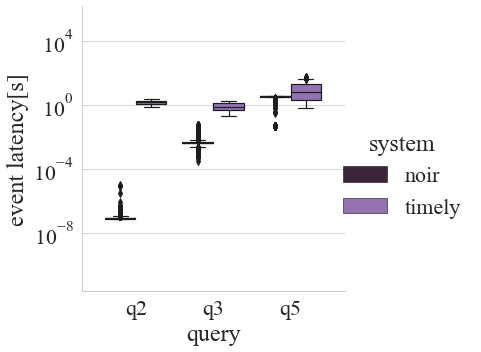

In [4]:
g = sns.catplot(data=df, x="name", y="time", hue="system", kind="box",
                palette=palette)
g.ax.margins(0.5)
g.set_axis_labels(x_var="query", y_var="event latency[s]")
plt.semilogy()
plt.savefig("plots/nexmark-latency-box.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


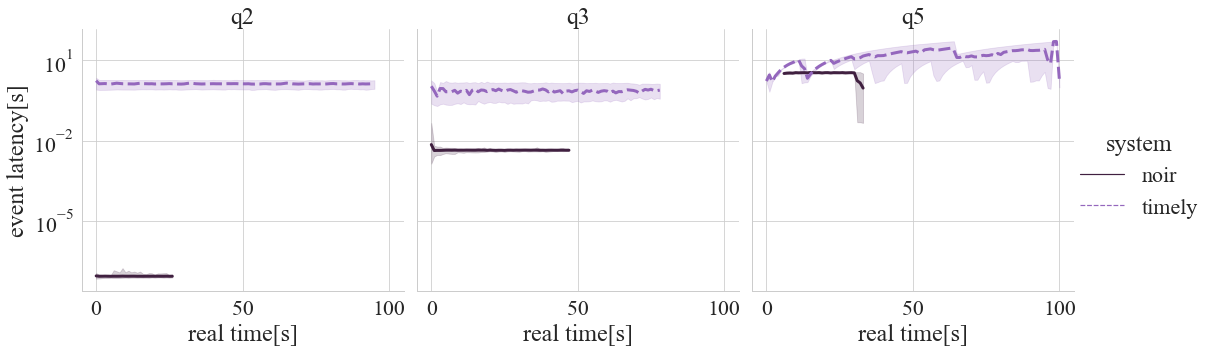

In [5]:
# plt.tight_layout()
g = sns.relplot(data=df, x="end_bkt", y="time", hue="system",
                style="system", col="query", kind="line", err_style="band",
                markers=False, errorbar=('pi', 99), linewidth=3,
                palette=palette)
g.set_titles(template="{col_name}")
g.set_axis_labels(x_var="real time[s]", y_var="event latency[s]")
plt.semilogy()
leg = plt.legend(frameon=False, labelspacing=0.1)
for line in leg.get_lines():
    line.set_linewidth(3.0)
plt.savefig("plots/nexmark-latency-line.pdf")

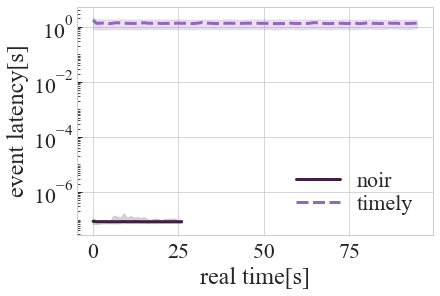

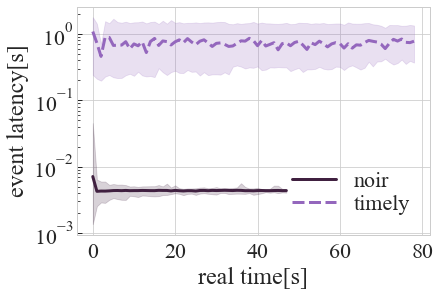

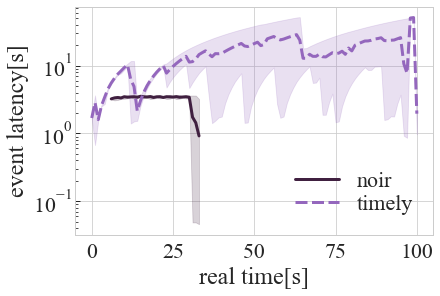

In [16]:
with sns.axes_style(rc={"ytick.direction": "in",
                  "ytick.left": True}):
    for q in ["q2", "q3", "q5"]:
        dq = df[df["name"] == q]
        plt.subplots(layout="constrained")
        g = sns.lineplot(data=dq, x="end_bkt", y="time", hue="system",
                        style="system", err_style="band", markers=False, errorbar=('pi', 99),
                        linewidth=3, palette=palette)
        # plt.xlabel("real time[s]")
        # plt.ylabel("event latency[s]")
        g.set_xlabel("real time[s]")
        g.set_ylabel("event latency[s]")
        leg = plt.legend(frameon=False, labelspacing=0.1, loc="lower right")
        for line in leg.get_lines():
            line.set_linewidth(3.0)
        plt.semilogy()
        locmin = LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)
        ax = plt.gca()
        ax.yaxis.set_minor_locator(locmin)
        ax.yaxis.set_minor_formatter(NullFormatter())
        [t.set_color('gray') for t in ax.yaxis.get_ticklines(minor=True)]
        plt.savefig(f"plots/nexmark-latency-line-{q}.pdf")
        plt.show()
        del g



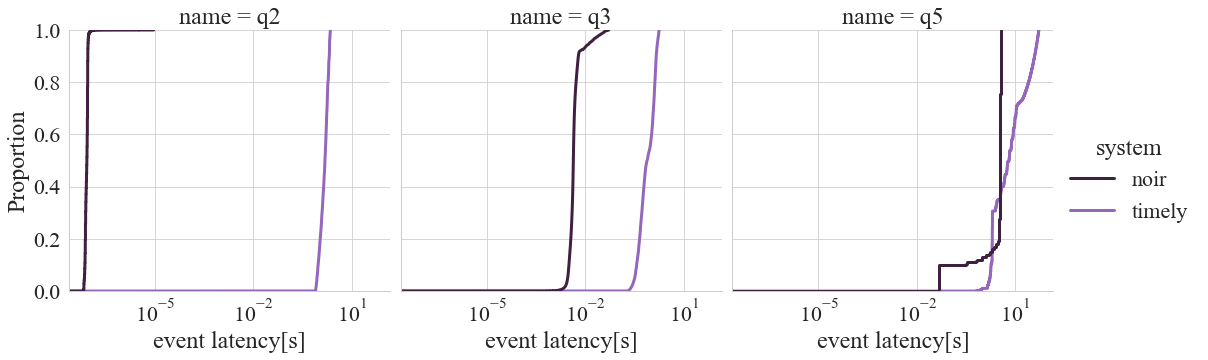

In [7]:
g = sns.displot(data=df, x="event latency[s]", hue="system", col="name", kind="ecdf",
                linewidth=3, palette=palette)
# g.set_axis_labels(x_var="event latency[s]")
plt.semilogx()
plt.savefig("plots/nexmark-latency-ecdf.pdf")
